In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



In [13]:
# Load the Iris Dataset
df = pd.read_csv('IRIS.csv')
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Remove the Species column
X = df.drop('species', axis=1)



In [16]:
# Function to apply DBSCAN and visualize results
def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.colorbar(label='Cluster')
    plt.show()

    print(f"Number of clusters: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
    print(f"Number of noise points: {list(clusters).count(-1)}")



In [17]:
# Parameters for DBSCAN
params = [
    (1, 5),
    (0.5, 3),
    (0.8, 6),
    (1.5, 4)
]



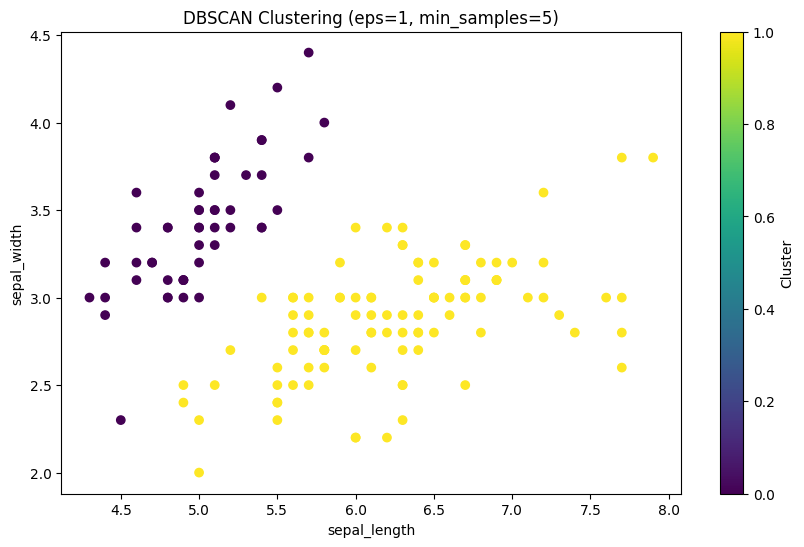

Number of clusters: 2
Number of noise points: 0


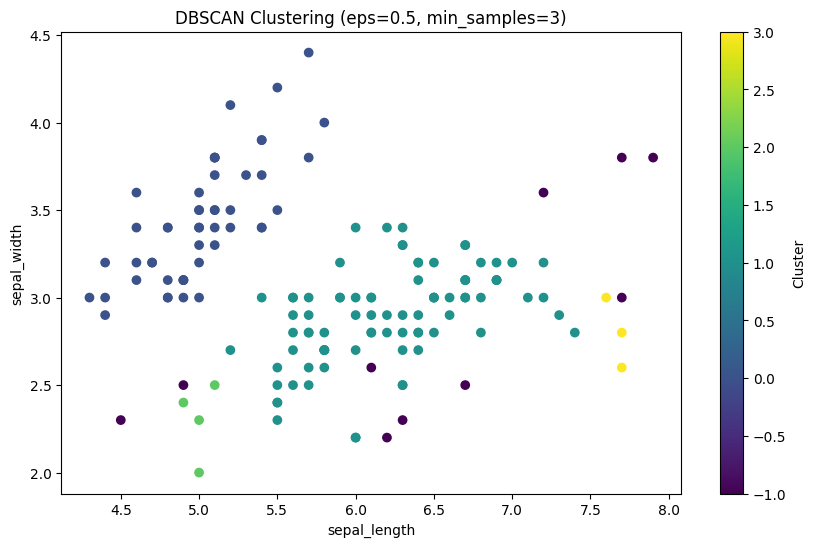

Number of clusters: 4
Number of noise points: 10


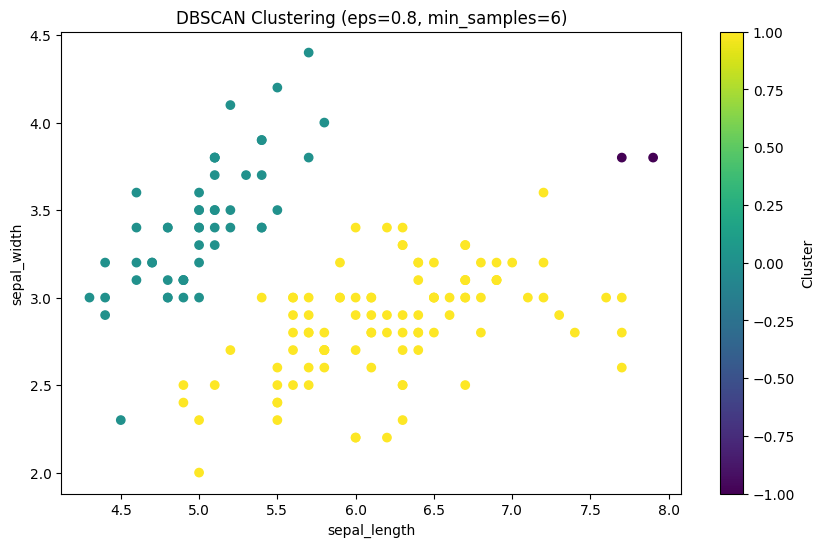

Number of clusters: 2
Number of noise points: 2


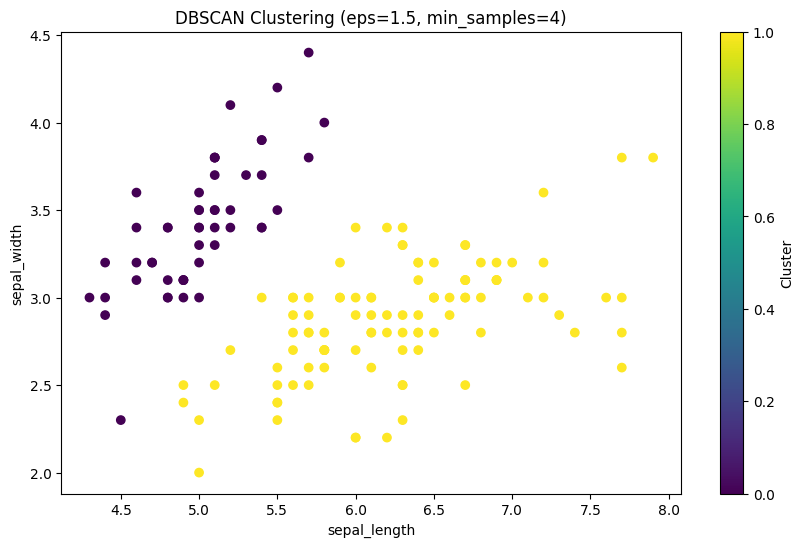

Number of clusters: 2
Number of noise points: 0


In [18]:
# Apply DBSCAN for each parameter combination
for eps, min_samples in params:
    apply_dbscan(X, eps, min_samples)